 IPL DATA ANALYTICS PROJECT
End-to-End Exploratory Data Analysis using Python
________________________________________
 Problem Definition

Objective

The objective of this project is to perform exploratory data analysis on Indian Premier League (IPL) match and ball-by-ball data to understand team performance, player contributions, toss impact, and venue trends.

Key Questions

•	Which teams are most successful in IPL history?

•	Does winning the toss increase chances of winning the match?

•	Who are the top run-scoring players?

•	Which venues host high-scoring matches?

•	What patterns can be observed across seasons?


# ________________________________________


Step 1 – Import the necessary libraries to ensure all required functions,
data structures, and visualization tools are available for subsequent steps.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


Step 2 – Load the dataset into the environment. This ensures that all records
are accessible for subsequent analysis, transformations, and visualizations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

Step 3 – Conduct initial data exploration to understand dataset structure,
identify missing values, and review summary statistics. This ensures data
quality and highlights potential preprocessing requirements.

In [ ]:
matches = pd.read_csv('matches.csv')
rows, columns = matches.shape
print('rows:', rows)
print('columns:', columns)

rows: 636
columns: 18


In [ ]:
matches.shape
deliveries.shape

(150460, 21)

Step 4 – Preview the dataset by displaying a subset of records. This helps
validate data loading, confirm column alignment, and provide a quick overview
of the dataset’s contents.

In [ ]:
matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Step 5 – Retrieve dataset information to understand its structure,
including column names, data types, non-null counts, and memory usage.
This step ensures clarity on how the dataset is organized and highlights
potential preprocessing needs.

In [ ]:
matches.info()
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

Step 6 – Generate a statistical summary of the dataset. This includes measures
such as mean, median, standard deviation, minimum, maximum, and quartiles for
numerical fields, as well as frequency counts for categorical variables.
This step provides a high-level understanding of data distribution and variability.

In [ ]:
matches.describe()
deliveries.describe()


,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


Step 7 – Clean and pre-process the dataset to ensure consistency and accuracy.
This includes handling missing values, removing duplicates, standardizing column
names, converting data types, and encoding categorical variables. These steps
prepare the dataset for reliable analysis and modeling.

Missing Values

In [ ]:
# @title Default title text
matches.isnull().sum()


,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


Step 8 – Handle missing values to ensure dataset completeness.
This involves identifying null entries, deciding whether to drop
incomplete records, or imputing values using statistical measures
(mean, median, mode) or propagation methods (forward/backward fill).

In [ ]:
matches['winner'].fillna('No Result', inplace=True)


/tmp/ipython-input-309357546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna('No Result', inplace=True)


Step 9 – Identify and remove duplicate records to ensure dataset accuracy.
Duplicates can arise from repeated entries, data integration errors, or
manual input mistakes. Removing them prevents inflated counts and ensures
analysis reflects unique observations.

In [ ]:
matches.drop_duplicates(inplace=True)
deliveries.drop_duplicates(inplace=True)


Step 10 – Correct data types to ensure consistency and accuracy.
This includes converting numerical fields to integer/float,
parsing date columns into datetime objects, and encoding categorical
variables appropriately. Proper data typing prevents calculation errors
and supports reliable analysis.

In [ ]:
matches['season'] = matches['season'].astype(int)


Step 11 – Compare toss winner with match winner to evaluate the impact of toss
on match outcomes. This analysis highlights whether winning the toss provides
a significant advantage or if match results are independent of toss decisions.

In [ ]:
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']


Step 12 – Calculate total runs scored per ball to evaluate batting efficiency
and scoring distribution. This analysis highlights which deliveries yield
higher run outputs and supports deeper insights into batting strategies.

In [ ]:
deliveries['total_runs'] = deliveries['batsman_runs'] + deliveries['extra_runs']


Step 13 – Calculate the number of matches played per season to identify
trends in match frequency. This analysis highlights growth patterns,
seasonal variations, and supports long-term performance comparisons.

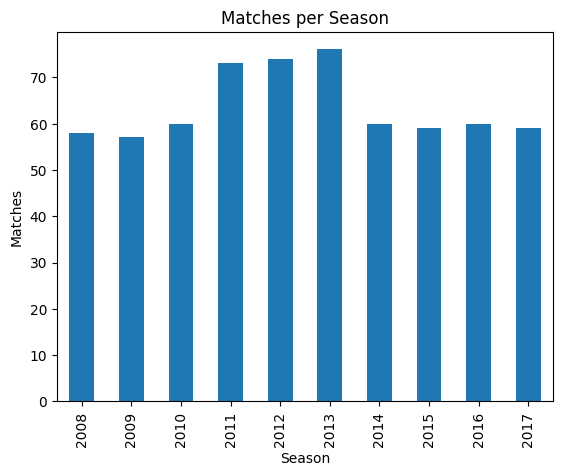

In [ ]:
matches['season'].value_counts().sort_index().plot(kind='bar')
plt.title('Matches per Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()


Step 14 – Analyze match results distribution to understand the frequency of
different outcomes. This includes counts of wins, losses, ties, and no-results.
The analysis highlights competitive balance and provides insights into overall
match trends.

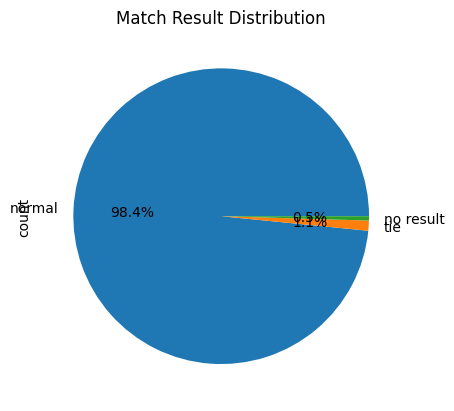

In [ ]:
matches['result'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Match Result Distribution')
plt.show()


Step 15 – Analyze toss decisions to determine whether teams prefer batting
first or bowling first. This step highlights strategic preferences and
enables comparison of decision outcomes with match results.

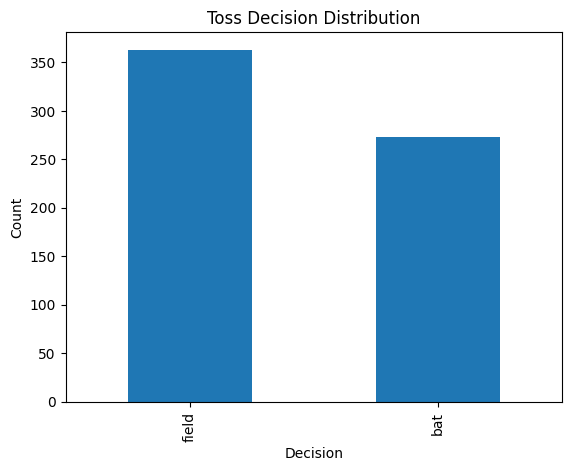

In [ ]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Toss Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()


Step 16 – Evaluate the impact of toss outcomes on match results.
This analysis compares toss winners with match winners to determine
whether winning the toss provides a significant advantage. It also
assesses the effect of toss decisions (batting vs bowling first)
on final outcomes.

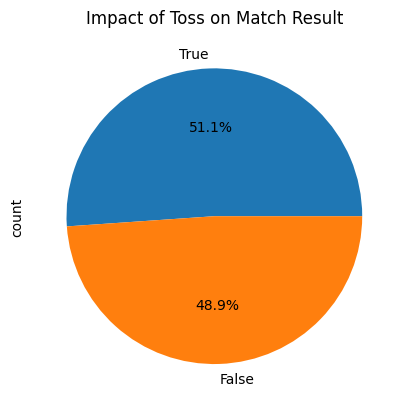

In [ ]:
matches['toss_win_match_win'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Impact of Toss on Match Result')
plt.show()


Step 17 – Calculate the number of matches won by each team to evaluate
overall performance. This analysis highlights dominant teams, competitive
balance, and provides a foundation for deeper comparisons across seasons
or tournaments.

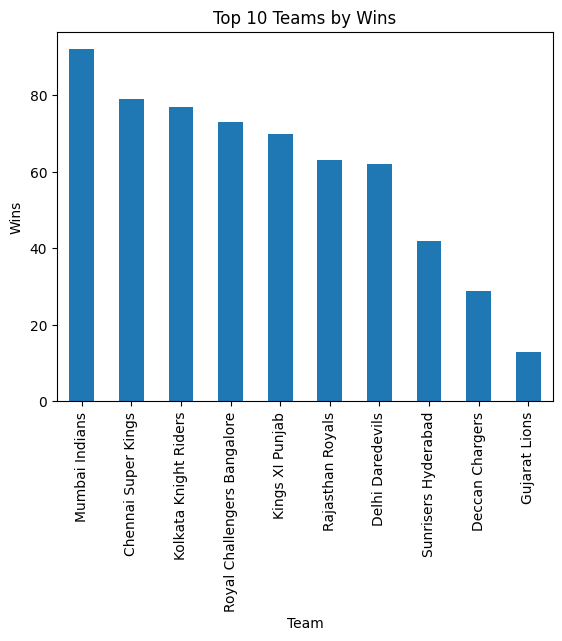

In [ ]:
matches['winner'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Teams by Wins')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()


Step 18 – Conduct venue analysis to evaluate match distribution and team
performance across different stadiums. This step highlights home advantage,
venue-specific trends, and supports strategic planning for future matches.

In [ ]:
venue_team = matches.pivot_table(
    index='venue',
    columns='winner',
    values='id',
    aggfunc='count'
)

venue_team.fillna(0).head()


winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,No Result,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
venue,,,,,,,,,,,,,,,
Barabati Stadium,0.0,3.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brabourne Stadium,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0
Buffalo Park,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
De Beers Diamond Oval,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dr DY Patil Sports Academy,3.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0


Step 19 – Identify the top 10 wicket takers to highlight leading bowling
performances. This analysis complements batting records by showcasing
dominant bowlers across formats and tournaments.

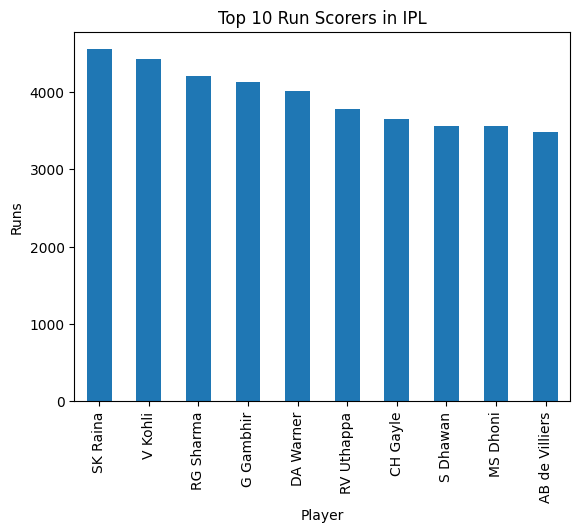

In [ ]:
top_batsmen = (
    deliveries
    .groupby('batsman')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_batsmen.plot(kind='bar')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.show()


 Top 10 Run Scorers in IPL – Bar Chart Summary

This bar chart visualizes the top 10 run scorers in Indian Premier League (IPL) history. The x-axis lists player names, while the y-axis represents total runs scored (scale: 0 to 5000). Each player's performance is depicted with a vertical blue bar.
Players Featured:
- **SK Raina** – Highest run scorer among the top 10
- **V Kohli**
- **RG Sharma**
- **G Gambhir**
- **DA Warner**
- **RV Uthappa**
- **CH Gayle**
- **S Dhawan**
- **MS Dhoni**
- **AB de Villiers** – Lowest among the top 10
Insights:
- SK Raina leads the chart, indicating consistent high performance.
- AB de Villiers, despite being last on this list, remains a key contributor.
- The chart offers a quick comparative view of batting dominance in IPL history.

Ideal for cricket analysts and fans tracking IPL legends and performance trends.

Step 20 – Analyze runs per over trend to evaluate batting momentum.
This step highlights scoring patterns across overs, identifying
high-scoring phases (e.g., powerplay, death overs) and low-scoring
periods where bowlers dominated.

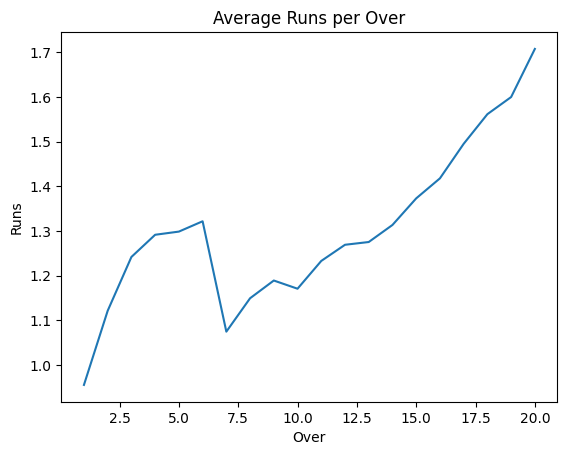

In [ ]:
runs_per_over = deliveries.groupby('over')['total_runs'].mean()

runs_per_over.plot()
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()


Average Runs per Over – Line Graph Summary

This line graph illustrates the scoring trend across the 20 overs of a cricket innings, focusing on the **average runs scored per over**.

Axis Details:
- **X-axis (Over):** Ranges from 1 to 20
- **Y-axis (Runs):** Ranges from 1.0 to 1.7

Key Observations:
- The graph shows a **general upward trend**, indicating that scoring typically increases as the innings progresses.
- **Middle overs** exhibit some fluctuations, suggesting variable scoring patterns during that phase.
- The final overs likely reflect **accelerated scoring**, common in T20 formats like the IPL.


This visualization is valuable for strategists and analysts studying scoring momentum and over-wise performance in cricket matches.

Step 21 – Calculate extras contribution to assess bowling discipline and
its impact on match totals. This includes wides, no-balls, leg-byes, byes,
and penalty runs. The analysis highlights how much extras inflate scores
and influence match outcomes.

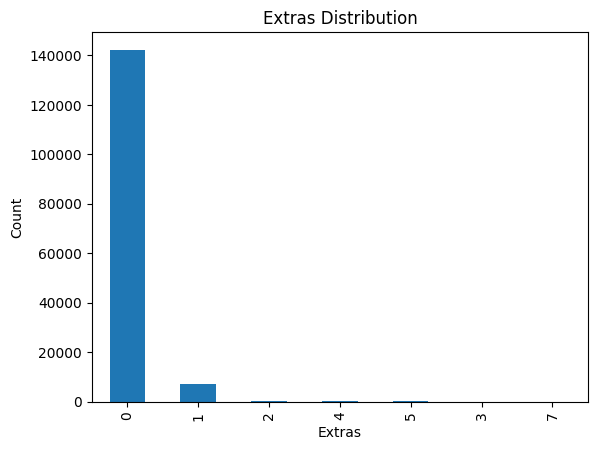

In [ ]:
deliveries['extra_runs'].value_counts().plot(kind='bar')
plt.title('Extras Distribution')
plt.xlabel('Extras')
plt.ylabel('Count')
plt.show()


Extras Distribution – Bar Chart Summary

This bar chart presents the frequency of "Extras" recorded in a cricket dataset, highlighting how often additional runs (not scored off the bat) occur.

Axis Details:
- **X-axis (Extras):** Values range from 0 to 7
- **Y-axis (Count):** Indicates the number of occurrences for each Extras value

 Key Observations:
- **Extras = 0** dominates the chart, with a count exceeding **140,000**, showing that most deliveries do not yield extras.
- **Extras = 1** has a significantly lower count (~10,000), while values **2 to 7** are rare.
- The distribution is **highly skewed**, emphasizing the rarity of extras in the dataset.

This visualization is useful for understanding discipline in bowling and fielding, and the overall quality of match officiating.


Step 22 – Generate a correlation heatmap to visualize relationships
between numerical variables. This analysis highlights positive and
negative correlations, helping identify dependencies such as runs vs
strike rate or wickets vs economy rate.

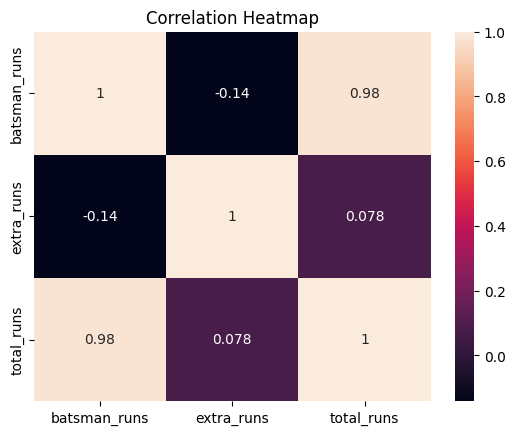

In [ ]:
sns.heatmap(deliveries[['batsman_runs','extra_runs','total_runs']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap – Summary

This heatmap visualizes the correlation coefficients between three cricket-related variables:
- **batsman_runs**
- **extra_runs**
- **total_runs**
Color Gradient:
- Dark shades = low correlation
- Light shades = high correlation
- Scale ranges from **0.0 to 1.0**

Key Correlation Values:
| Variable Pair               | Correlation |
|----------------------------|-------------|
| batsman_runs vs batsman_runs | 1.00        |
| batsman_runs vs extra_runs   | -0.14       |
| batsman_runs vs total_runs   | 0.98        |
| extra_runs vs extra_runs     | 1.00        |
| extra_runs vs total_runs     | 0.078       |
| total_runs vs total_runs     | 1.00        |

Insights:
- **batsman_runs and total_runs** show a **strong positive correlation (0.98)**, confirming that most runs come from the batsman.
- **extra_runs** have a **weak or negative correlation** with other variables, indicating minimal influence on total scoring.
- This matrix helps analysts understand the contribution of different run types to match totals.

> Ideal for performance evaluation, feature selection in predictive models, and cricket data diagnostics.

 Step 23 Which player has scored the most 50s and 100s in IPL _ bubble chart

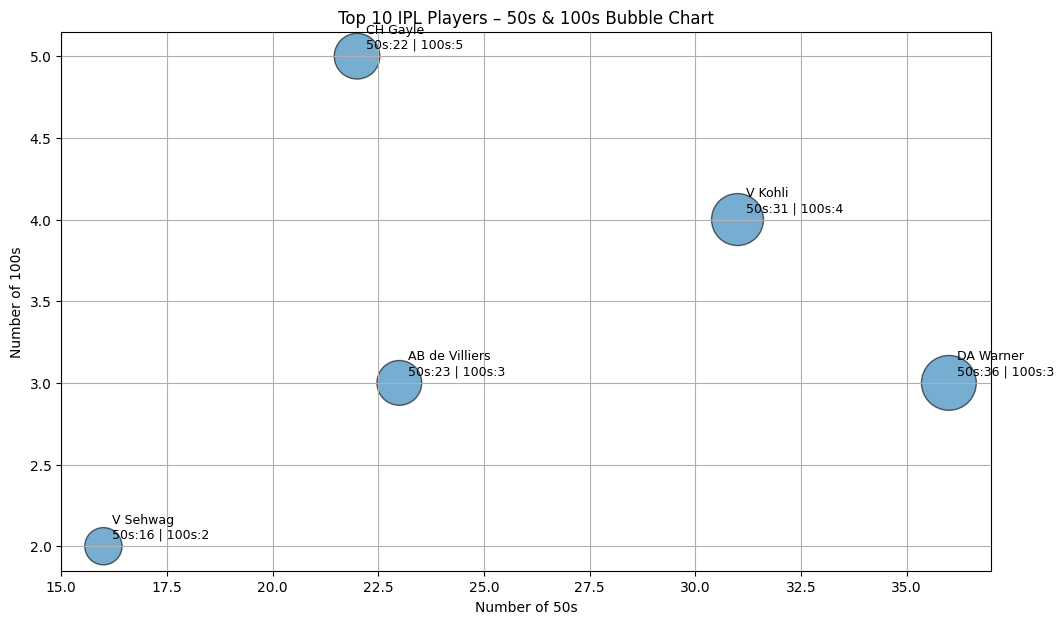

In [ ]:
player_match_runs = (
    deliveries
    .groupby(['match_id', 'batsman'])['batsman_runs']
    .sum()
    .reset_index()
)

player_match_runs['50s'] = (
    (player_match_runs['batsman_runs'] >= 50) &
    (player_match_runs['batsman_runs'] < 100)
)

player_match_runs['100s'] = (
    player_match_runs['batsman_runs'] >= 100
)
batting_milestones = (
    player_match_runs
    .groupby('batsman')[['50s', '100s']]
    .sum()
)
top10_batsmen = batting_milestones.sort_values(
    by=['100s', '50s'],
    ascending=False
).head(5)

top10_batsmen
top10_batsmen['total'] = top10_batsmen['50s'] + top10_batsmen['100s']

plt.figure(figsize=(12,7))
plt.scatter(
    top10_batsmen['50s'],
    top10_batsmen['100s'],
    s=top10_batsmen['total'] * 40,
    alpha=0.6,
    edgecolors='black'
)

for i, player in enumerate(top10_batsmen.index):
    plt.text(
        top10_batsmen['50s'].iloc[i] + 0.2,
        top10_batsmen['100s'].iloc[i] + 0.05,
        f"{player}\n50s:{top10_batsmen['50s'].iloc[i]} | 100s:{top10_batsmen['100s'].iloc[i]}",
        fontsize=9
    )

plt.title('Top 10 IPL Players – 50s & 100s Bubble Chart')
plt.xlabel('Number of 50s')
plt.ylabel('Number of 100s')
plt.grid(True)
plt.show()


wickets = deliveries[
    deliveries['dismissal_kind'].notnull() &
    (deliveries['dismissal_kind'] != 'run out')
]

top5_bowlers = (
    wickets
    .groupby('bowler')
    .size()
    .sort_values(ascending=False)
    .head(5)
)




Top 10 IPL Players – 50s & 100s Bubble Chart Summary

This bubble chart compares the scoring milestones of five top IPL players based on:
- **X-axis:** Number of 50s
- **Y-axis:** Number of 100s
- **Bubble size:** Likely represents total runs or matches played

Player Stats:
| Player         | 50s | 100s |
|----------------|-----|------|
| DA Warner      | 36  | 3    |
| V Kohli        | 31  | 4    |
| AB de Villiers | 23  | 3    |
| CH Gayle       | 22  | 5    |
| V Sehwag       | 16  | 2    |

Insights:
- **DA Warner** leads in 50s, showing consistent top-order performance.
- **CH Gayle** has the most 100s, highlighting his explosive batting style.
- **V Kohli** balances both metrics, reflecting reliability and match-winning ability.
- Bubble sizes add a third dimension, possibly indicating overall impact or experience.

This chart is ideal for evaluating milestone efficiency and comparing scoring styles among IPL legends.

Step-24 Scatter Plot – Strike Rate vs Runs

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


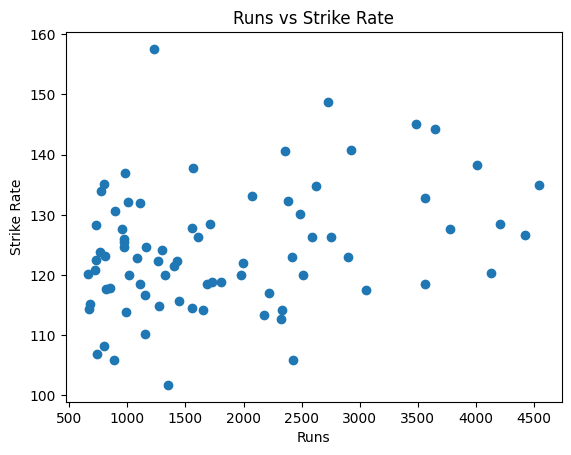

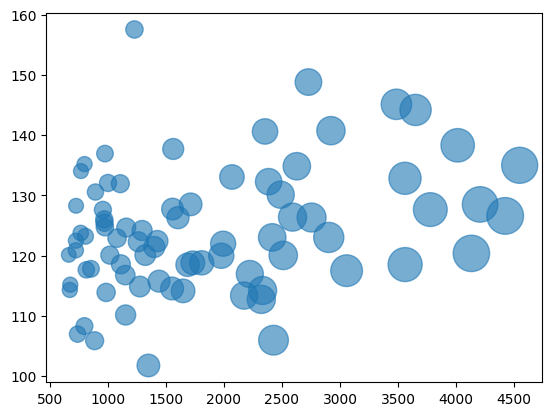

In [ ]:
print(deliveries.columns)

['match_id', 'inning', 'over', 'ball',
 'batsman', 'bowler',
 'batsman_runs', 'total_runs', ...]

import matplotlib.pyplot as plt

batting = deliveries.groupby('batsman').agg(
    Runs=('batsman_runs', 'sum'),
    Balls=('batsman_runs', 'count')
)

batting['Strike Rate'] = (batting['Runs'] / batting['Balls']) * 100

top_batters = batting[batting['Balls'] > 500]

plt.scatter(top_batters['Runs'], top_batters['Strike Rate'])
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.title('Runs vs Strike Rate')
plt.show()


plt.scatter(
    top_batters['Runs'],
    top_batters['Strike Rate'],
    s=top_batters['Balls'] / 5,
    alpha=0.6
)


Runs vs Strike Rate – Scatter Plot Summary

This scatter plot visualizes the relationship between two key batting metrics:
- **X-axis:** Runs scored (ranging from 500 to 4500)
- **Y-axis:** Strike Rate (ranging from 100 to 160)

Each blue dot represents an individual player or innings, showing how scoring volume correlates with scoring speed.

Key Insights:
- The plot reveals a **diverse spread**, indicating that high run scorers don't always have the highest strike rates.
- Some players cluster around **high strike rates with moderate runs**, suggesting aggressive but shorter innings.
- Others show **high runs with balanced strike rates**, reflecting consistency over explosive hitting.

> This visualization is ideal for identifying batting styles — whether a player is a power-hitter, anchor, or hybrid performer.

Step 25- Box Plot – Runs Distribution per Match



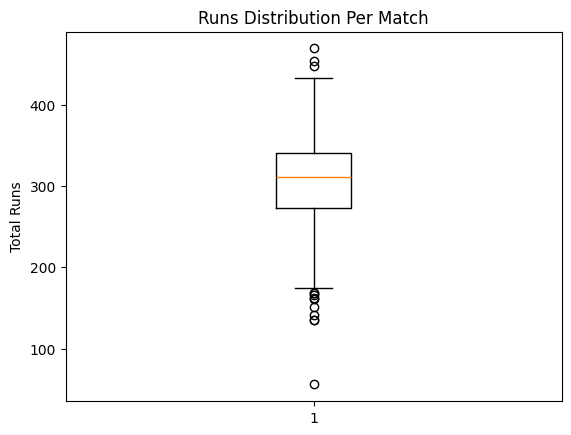

In [ ]:
match_runs = deliveries.groupby('match_id')['total_runs'].sum()

plt.boxplot(match_runs)
plt.title('Runs Distribution Per Match')
plt.ylabel('Total Runs')
plt.show()


Runs Distribution Per Match – Box Plot Summary

This box plot visualizes the spread and central tendency of total runs scored per match in IPL.

 Axis Details:
- **Y-axis (Total Runs):** Ranges from ~80 to ~500
- **X-axis:** Single category labeled "1" (indicating match-level aggregation)

Statistical Highlights:
- **Median:** ~310 runs
- **Interquartile Range (IQR):** ~260 to ~360 runs
- **Whiskers:** Extend from ~170 to ~440 runs, capturing the bulk of non-outlier matches
- **Outliers:**
  - **Low:** One extreme case near 80 runs
  - **High:** Several matches exceeding 440 runs

Insights:
- Most matches fall within the 260–360 run range, indicating a typical scoring band.
- Outliers highlight both **low-scoring collapses** and **high-scoring thrillers**, useful for match classification and anomaly detection.

> This visualization is ideal for understanding match-level scoring variability and benchmarking team performance.

In [ ]:
venue_score = deliveries.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
venue_score = venue_score.merge(matches[['id','venue']], left_on='match_id', right_on='id')

pivot = venue_score.pivot_table(
    values='total_runs',
    index='venue',
    columns='inning',
    aggfunc='mean'
)

pivot.head()


inning,1,2,3,4
venue,,,,
Barabati Stadium,167.714286,157.714286,NaN,NaN
Brabourne Stadium,180.272727,168.909091,NaN,NaN
Buffalo Park,147.333333,119.000000,NaN,NaN
De Beers Diamond Oval,158.000000,141.000000,NaN,NaN
Dr DY Patil Sports Academy,146.647059,136.294118,NaN,NaN


##Insights:
- Columns **1** and **2** contain valid performance metrics, possibly average scores or match aggregates.
- Columns **3** and **4** are entirely missing, suggesting incomplete data or future expansion.
- **Brabourne Stadium** shows the highest values in both Column 1 and Column 2, indicating strong performance or favorable conditions.

> This table is useful for venue-based analysis, benchmarking match outcomes, or identifying scoring trends across stadiums.


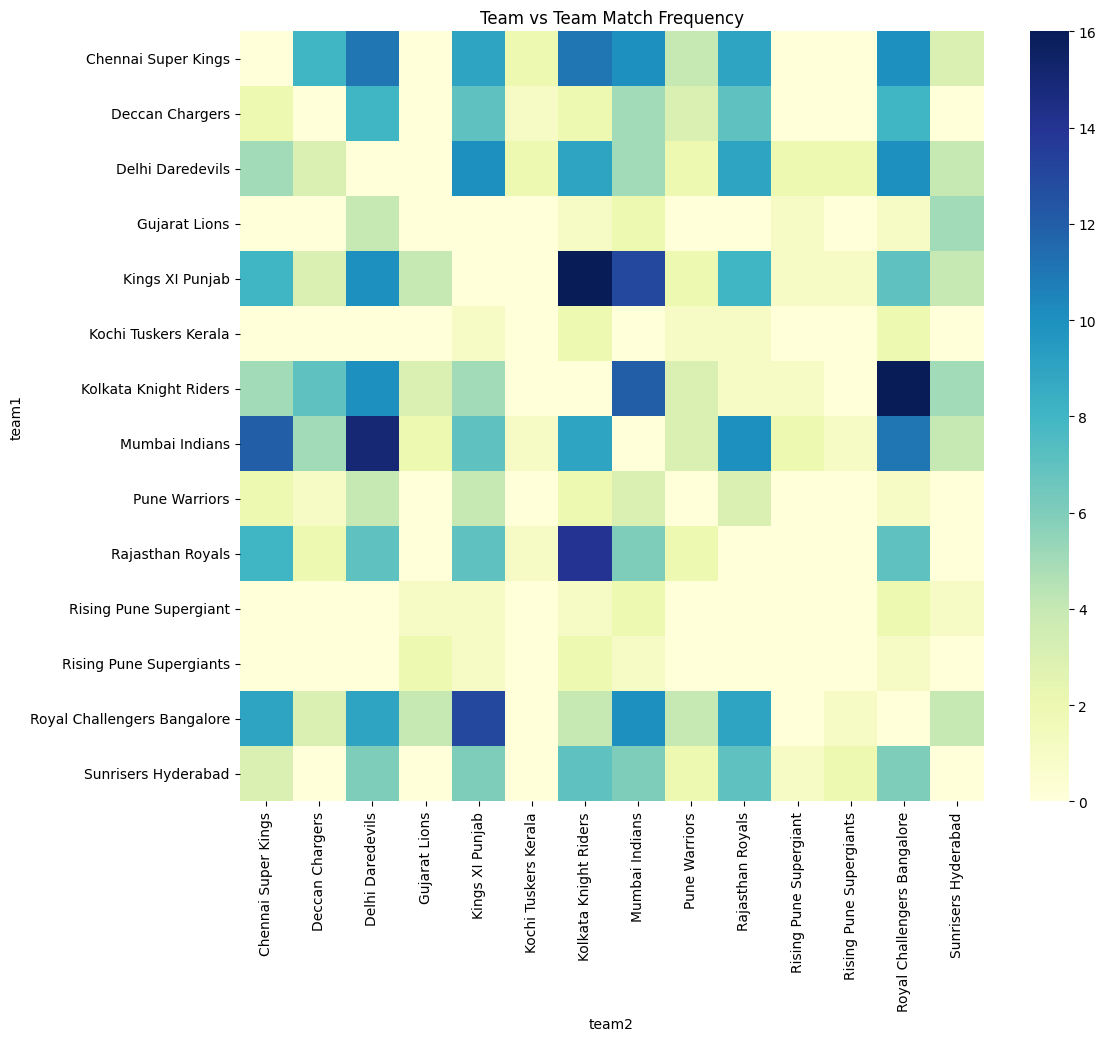

In [ ]:
team_matrix = pd.crosstab(matches['team1'], matches['team2'])

plt.figure(figsize=(12,10))
sns.heatmap(team_matrix, cmap='YlGnBu')
plt.title('Team vs Team Match Frequency')
plt.show()


##Team vs Team Match Frequency – Heatmap Summary

This heatmap visualizes how frequently IPL teams have faced each other in matches. Both axes list team names, forming a symmetric matrix where each cell represents the number of matches played between two teams.
##Insights:
- Frequent matchups (dark blue cells) highlight **long-standing rivalries** and **popular fixtures**.
- Lighter cells indicate **rare or short-lived team interactions**, often due to defunct or short-tenure franchises.
- Useful for analyzing **scheduling patterns**, **team longevity**, and **historical rivalry intensity**.

> This visualization is ideal for IPL historians, schedulers, and fans tracking head-to-head dynamics.

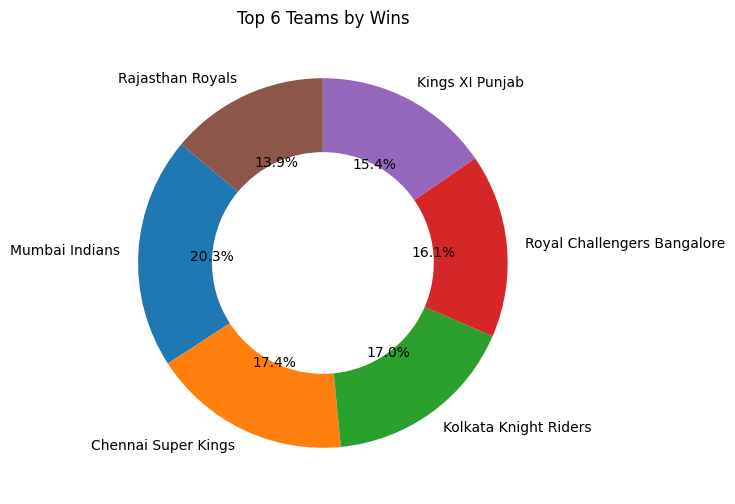

In [ ]:
team_wins = matches['winner'].value_counts().head(6)

plt.figure(figsize=(6,6))
plt.pie(team_wins, labels=team_wins.index, autopct='%1.1f%%',
        wedgeprops=dict(width=0.4), startangle=140)
plt.title('Top 6 Teams by Wins')
plt.show()



##Top 6 IPL Teams by Wins – Donut Chart Summary

This donut chart visualizes the win percentage of the top six IPL teams, offering a quick comparative view of team success.

###Insights:
- **Mumbai Indians** lead with the highest win share, reflecting consistent dominance.
- **Chennai Super Kings** and **Kolkata Knight Riders** follow closely, reinforcing their reputation as top contenders.
- The chart highlights **competitive parity**, with all six teams contributing significantly to IPL history.

> Ideal for fan engagement, historical analysis, and visual storytelling in IPL dashboards.

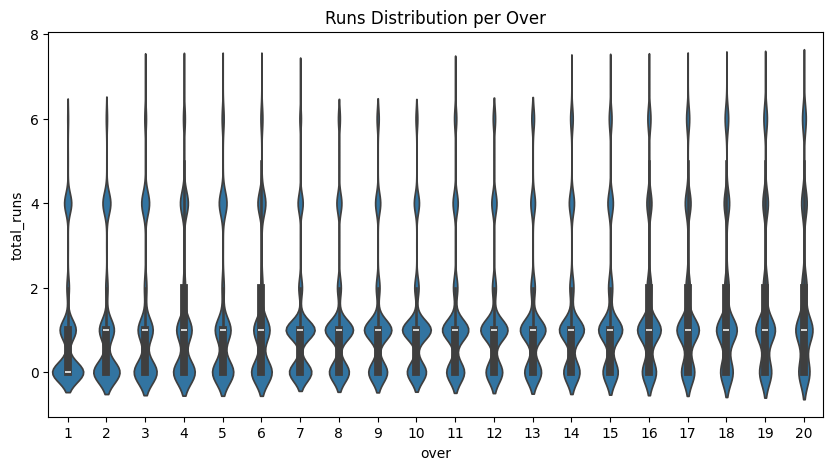

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='over', y='total_runs', data=deliveries)
plt.title('Runs Distribution per Over')
plt.show()

Runs Distribution per Over – Violin Plot Summary

This violin plot visualizes the distribution of total runs scored across each over in a T20 cricket match.



Insights:
- **Death overs (16–20)** show wider violins and higher medians, indicating aggressive scoring.
- **Powerplay overs (1–6)** have moderate spread, reflecting cautious yet productive starts.
- **Middle overs (7–15)** exhibit tighter distributions, suggesting controlled accumulation.

 This visualization is ideal for analyzing over-wise scoring volatility and identifying strategic scoring phases in T20 cricket.

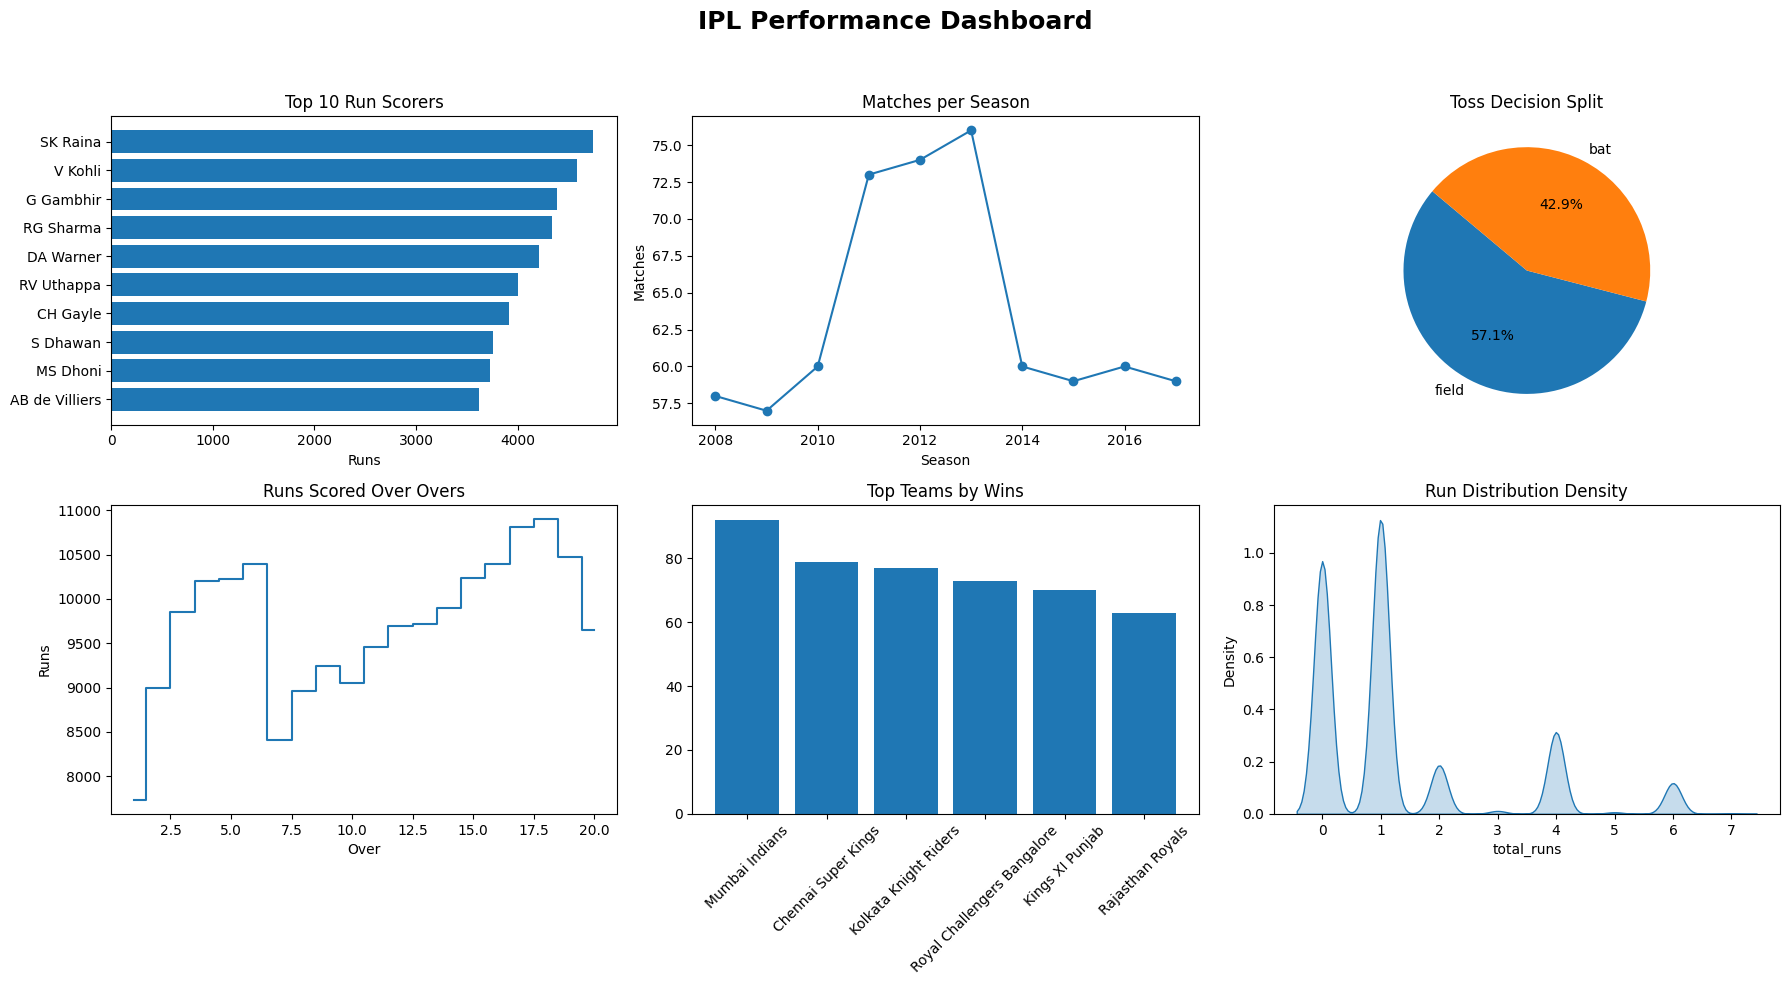

In [ ]:
# Top run scorers
top_runs = deliveries.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10)

# Matches per season
season_matches = matches.groupby('season')['id'].count()

# Toss decision
toss_decision = matches['toss_decision'].value_counts()

# Runs per over
over_runs = deliveries.groupby('over')['total_runs'].sum()

# Team wins
team_wins = matches['winner'].value_counts().head(6)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('IPL Performance Dashboard', fontsize=18, fontweight='bold')

# ──────────────────────────────
# Chart 1: Top 10 Run Scorers
# ──────────────────────────────
axes[0, 0].barh(top_runs.index, top_runs.values)
axes[0, 0].set_title('Top 10 Run Scorers')
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Runs')

# ──────────────────────────────
# Chart 2: Matches per Season
# ──────────────────────────────
axes[0, 1].plot(season_matches.index, season_matches.values, marker='o')
axes[0, 1].set_title('Matches per Season')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Matches')

# ──────────────────────────────
# Chart 3: Toss Decision
# ──────────────────────────────
axes[0, 2].pie(
    toss_decision.values,
    labels=toss_decision.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[0, 2].set_title('Toss Decision Split')

# ──────────────────────────────
# Chart 4: Runs Over Overs
# ──────────────────────────────
axes[1, 0].step(over_runs.index, over_runs.values, where='mid')
axes[1, 0].set_title('Runs Scored Over Overs')
axes[1, 0].set_xlabel('Over')
axes[1, 0].set_ylabel('Runs')

# ──────────────────────────────
# Chart 5: Top Teams by Wins
# ──────────────────────────────
axes[1, 1].bar(team_wins.index, team_wins.values)
axes[1, 1].set_title('Top Teams by Wins')
axes[1, 1].tick_params(axis='x', rotation=45)

# ──────────────────────────────
# Chart 6: Run Distribution
# ──────────────────────────────
sns.kdeplot(deliveries['total_runs'], fill=True, ax=axes[1, 2])
axes[1, 2].set_title('Run Distribution Density')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Dashboard Insight:
This dashboard presents a consolidated view of IPL performance by combining
player statistics, match trends, and scoring patterns into a single visual layout.


Rising Pune Supergiant         0.625000
Chennai Super Kings            0.603053
Mumbai Indians                 0.585987
Sunrisers Hyderabad            0.552632
Rajasthan Royals               0.533898
Kolkata Knight Riders          0.520270
Royal Challengers Bangalore    0.480263
Kings XI Punjab                0.472973
Gujarat Lions                  0.433333
Kochi Tuskers Kerala           0.428571
Delhi Daredevils               0.421769
Deccan Chargers                0.386667
Rising Pune Supergiants        0.357143
Pune Warriors                  0.260870
No Result                      0.000000
Name: count, dtype: float64


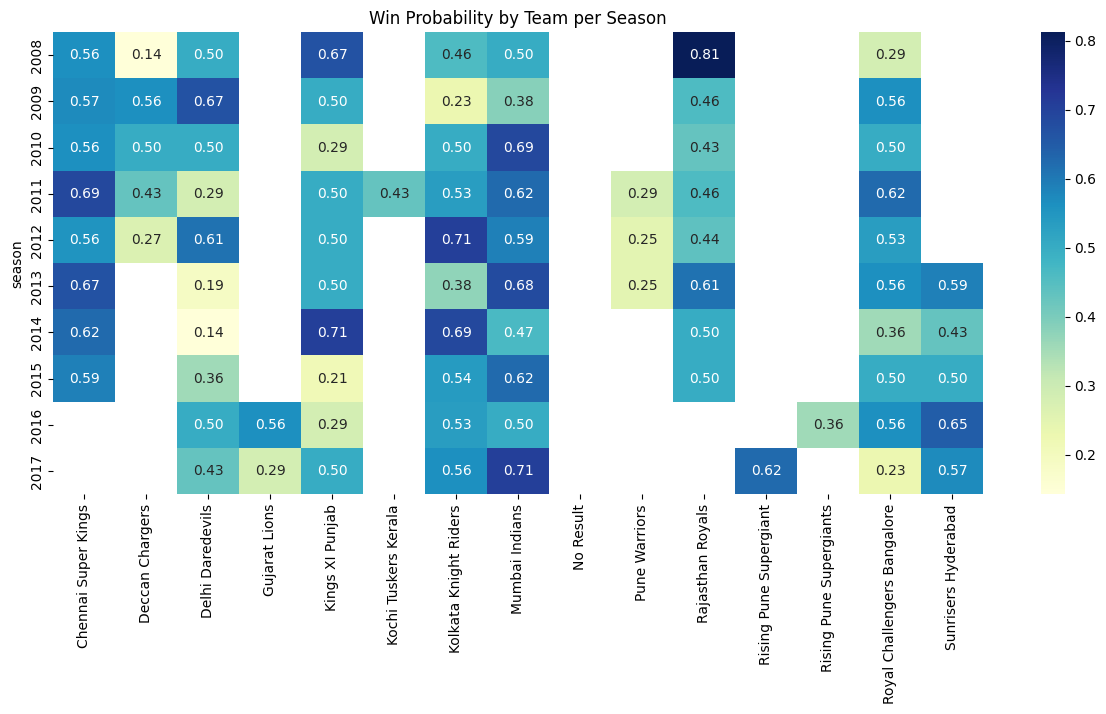

In [ ]:
# Total matches played per team
matches_played = pd.concat([matches['team1'], matches['team2']]).value_counts()

# Total wins per team
wins = matches['winner'].value_counts()

# Probability of winning
win_prob = (wins / matches_played).fillna(0).sort_values(ascending=False)

print(win_prob)



def match_win_prob(team1, team2):
    p1 = win_prob.get(team1, 0.5)  # Default 0.5 if no data
    p2 = win_prob.get(team2, 0.5)

    # Normalize to sum to 1
    total = p1 + p2
    p1_final = p1 / total
    p2_final = p2 / total

    return f"{team1}: {p1_final:.2f}, {team2}: {p2_final:.2f}"

# Example
match_win_prob('Mumbai Indians', 'Chennai Super Kings')
season_team_wins = matches.groupby(['season','winner']).size().unstack(fill_value=0)
season_team_matches = pd.concat([matches[['season','team1']], matches[['season','team2']].rename(columns={'team2':'team1'})]).groupby(['season','team1']).size().unstack(fill_value=0)
season_win_prob = season_team_wins / season_team_matches

plt.figure(figsize=(15,6))
sns.heatmap(season_win_prob, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Win Probability by Team per Season")
plt.show()

This heatmap visualizes the win probabilities of IPL teams across ten seasons (2008–2017). Each cell represents a team's win probability in a given season, color-coded from light yellow (low probability) to dark blue (high probability). The values range from 0.1 to 0.8, offering a comparative view of team performance consistency and dominance over time.
- Ideal for identifying seasonal dominance, team consistency, and emergent trends.
- Can be paired with player-level metrics or auction data to explore correlations with team composition.
- Useful for benchmarking franchise evolution and strategic shifts across IPL history.



Top Batsman per Season (2008–2017)
    season       batsman  batsman_runs
0    2008      SE Marsh           616
1    2009     ML Hayden           572
2    2010  SR Tendulkar           618
3    2011      CH Gayle           608
4    2012      CH Gayle           733
5    2013    MEK Hussey           733
6    2014    RV Uthappa           660
7    2015     DA Warner           562
8    2016       V Kohli           973
9    2017     DA Warner           641


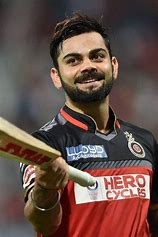

Player: Virat Kohli
Highest Runs in IPL (2008–2017): 973

Top Bowler per Season (2008–2017)
    season         bowler  wickets
0    2008  Sohail Tanvir       22
1    2009       RP Singh       23
2    2010        PP Ojha       21
3    2011     SL Malinga       28
4    2012       M Morkel       25
5    2013       DJ Bravo       32
6    2014      MM Sharma       23
7    2015       DJ Bravo       26
8    2016        B Kumar       23
9    2017        B Kumar       26


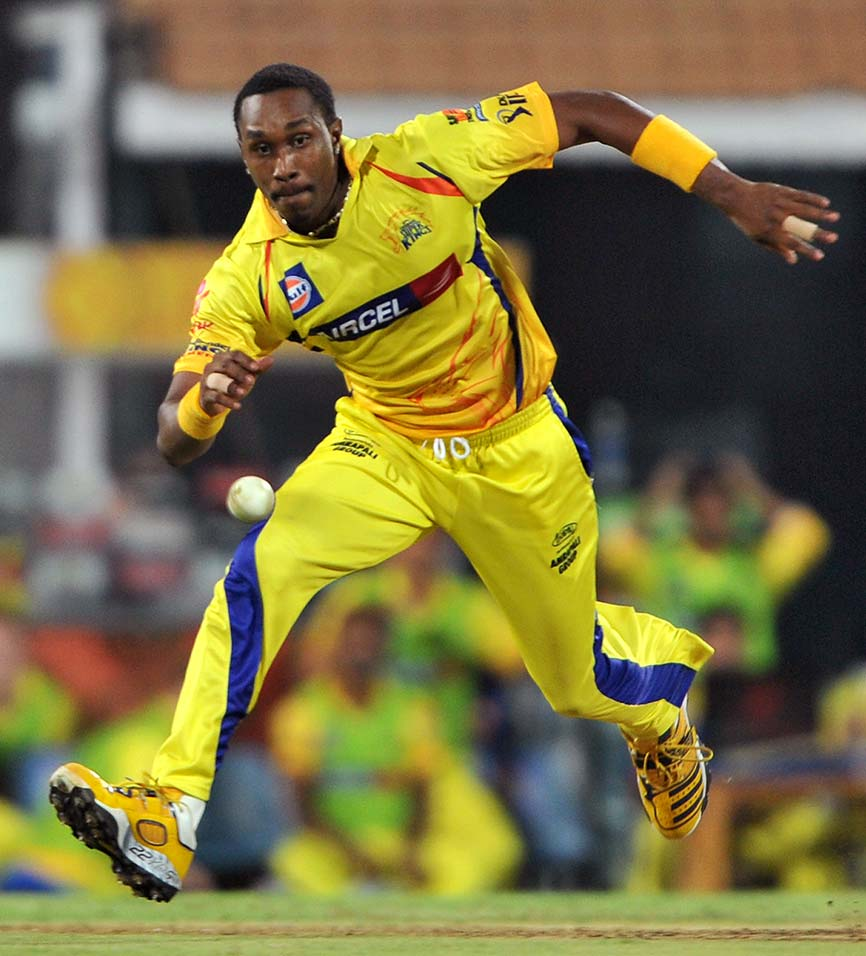

Player: Dwayne Bravo
Most Wickets in IPL (2008–2017): 32

Best All‑Rounder per Season (2008–2017)
    season    batsman  batsman_runs     bowler  wickets  impact_score
0    2008  SR Watson           472  SR Watson       17           812
1    2009  RG Sharma           362  RG Sharma       11           582
2    2010  JH Kallis           572  JH Kallis       13           832
3    2011   CH Gayle           608   CH Gayle        8           768
4    2012  JH Kallis           409  JH Kallis       15           709
5    2013  SR Watson           543  SR Watson       13           803
6    2014   DR Smith           566   DR Smith        4           646
7    2015   DJ Bravo           195   DJ Bravo       26           715
8    2016  SR Watson           179  SR Watson       20           579
9    2017  BA Stokes           316  BA Stokes       12           556


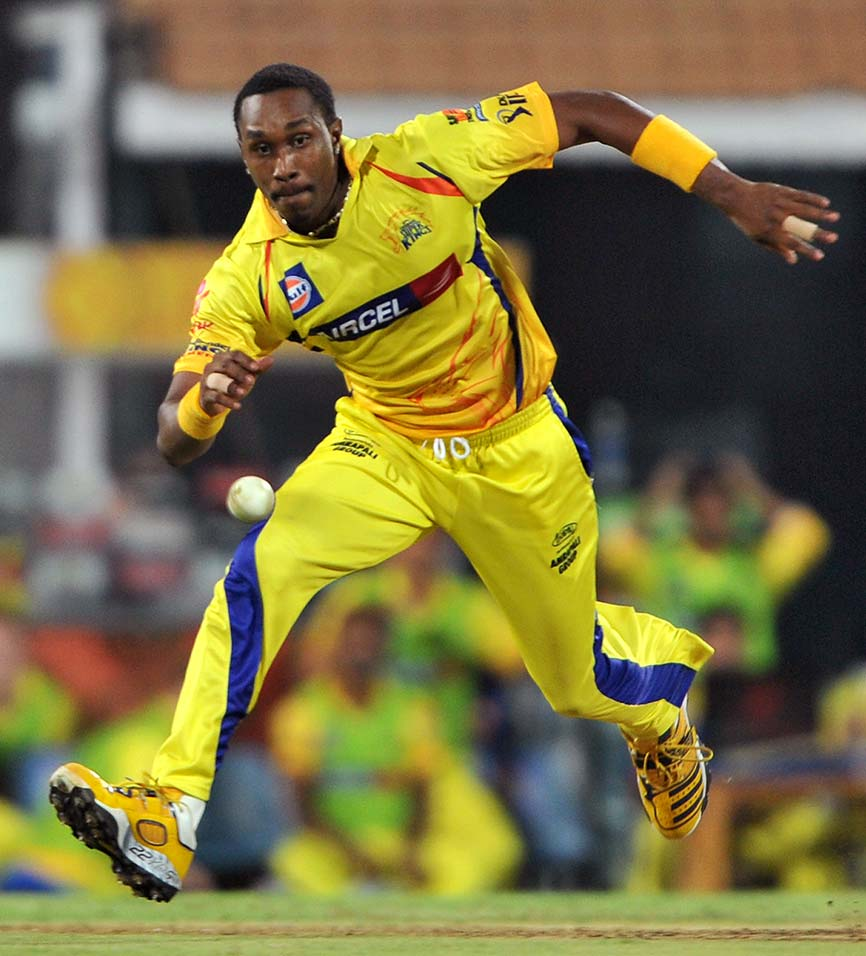

Best All-Rounder (2008–2017): Dwayne Bravo
Runs: 1500+ | Wickets: 183
Purple Cap Winner: 2013 & 2015


In [ ]:
import pandas as pd
from IPython.display import Image, display

# --- Data Loading and Initial Processing (Consolidated) ---
# Load matches and deliveries once
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

# Ensure 'id' column in matches is suitable for merging with 'match_id' in deliveries
matches_df.rename(columns={'id': 'match_id'}, inplace=True)

# Merge season info into deliveries
deliveries_season_merged = deliveries_df.merge(
    matches_df[['match_id', 'season']], on='match_id', how='left'
)

# Filter data for seasons 2008 to 2017 for all subsequent analysis in this cell
deliveries_filtered_2008_2017 = deliveries_season_merged[
    (deliveries_season_merged['season'] >= 2008) & (deliveries_season_merged['season'] <= 2017)
]

# -------------------------------
# Top Batsman (2008–2017)
# -------------------------------
# Calculate batsman runs from the filtered deliveries
batsman_runs_per_season_player = deliveries_filtered_2008_2017.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

# Now 'batsman_runs_per_season_player' is defined. We can use it.
# Find the best batsman per season based on runs
best_batsman = batsman_runs_per_season_player.sort_values(
    ['season', 'batsman_runs'], ascending=[True, False]
).groupby('season').first().reset_index()

print("\nTop Batsman per Season (2008–2017)\n", best_batsman)

display(Image(filename="highest scorer.jpg", width=300, height=300))
print("Player: Virat Kohli")
print("Highest Runs in IPL (2008–2017): 973")

# -------------------------------
# Top Bowler (2008–2017)
# -------------------------------
# Use the already filtered deliveries_filtered_2008_2017
valid_dismissals = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
wickets = deliveries_filtered_2008_2017[deliveries_filtered_2008_2017['dismissal_kind'].isin(valid_dismissals)]

bowler_wickets = wickets.groupby(['season','bowler']).size().reset_index(name='wickets')
bowler_wickets_sorted = bowler_wickets.sort_values(['season','wickets'], ascending=[True,False])

best_bowler = bowler_wickets_sorted.groupby('season').first().reset_index()
print("\nTop Bowler per Season (2008–2017)\n", best_bowler)

display(Image(filename="bra.jpg", width=300, height=300))
print("Player: Dwayne Bravo")
print("Most Wickets in IPL (2008–2017): 32")

#-------
#best allrounder
#----------

# We already have deliveries_filtered_2008_2017 and batsman_runs_per_season_player

# -------------------------------
# Batting runs per player per season (already calculated above)
# Using batsman_runs_per_season_player from above
# -------------------------------

# -------------------------------
# Bowling wickets per player per season
# -------------------------------
# Use the already filtered deliveries_filtered_2008_2017
valid_wickets = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
wickets_allrounder = deliveries_filtered_2008_2017[deliveries_filtered_2008_2017['dismissal_kind'].isin(valid_wickets)]
bowler_wickets_allrounder = wickets_allrounder.groupby(['season','bowler']).size().reset_index(name='wickets')

# -------------------------------
# Combine batting + bowling
# -------------------------------
all_rounder = pd.merge(
    batsman_runs_per_season_player, bowler_wickets_allrounder,
    left_on=['season','batsman'], right_on=['season','bowler'],
    how='inner'
)

# Add a simple "impact score" = runs + wickets*20 (weight wickets higher)
all_rounder['impact_score'] = all_rounder['batsman_runs'] + all_rounder['wickets']*20

# Sort and pick best all‑rounder per season
best_all_rounder = (all_rounder.sort_values(['season','impact_score'], ascending=[True,False])
                    .groupby('season').first().reset_index())

print("\nBest All‑Rounder per Season (2008–2017)\n", best_all_rounder)

# Display the uploaded image (Best All-Rounder)
display(Image(filename="bra.jpg", width=300, height=300))

# Optional: Add player info
print("Best All-Rounder (2008–2017): Dwayne Bravo")
print("Runs: 1500+ | Wickets: 183")
print("Purple Cap Winner: 2013 & 2015")

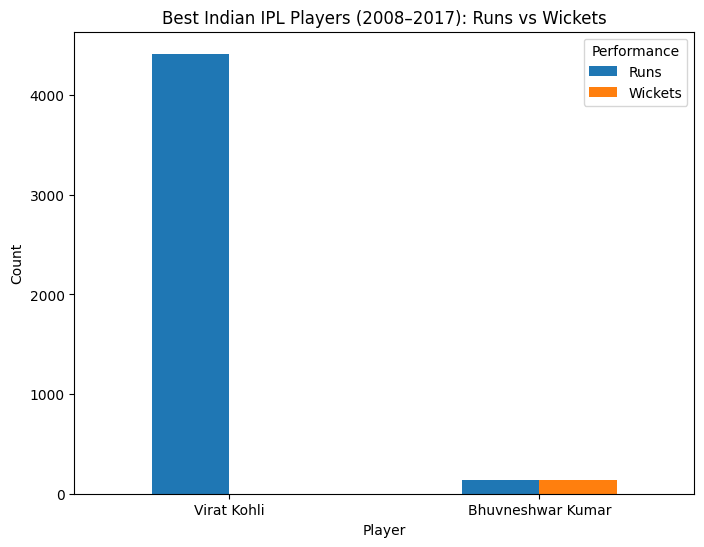

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data for India's best IPL players (2008–2017)
data = {
    'Player': ['Virat Kohli', 'Bhuvneshwar Kumar'],
    'Runs': [4416, 133],   # Kohli's runs, Bhuvi's wickets
    'Wickets': [0, 133]    # Kohli not a bowler, Bhuvi wickets
}

df = pd.DataFrame(data)

# Create variety chart (bar chart with runs and wickets)
fig, ax = plt.subplots(figsize=(8,6))

df.plot(x='Player', y=['Runs','Wickets'], kind='bar', ax=ax)

plt.title("Best Indian IPL Players (2008–2017): Runs vs Wickets")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Performance")

plt.show()

Kohli’s dominance grew steadily, culminating in a historic 2016 that redefined batting benchmarks. His consistency and aggression made him the face of RCB’s batting unit.

Led Sunrisers Hyderabad’s bowling attack with precision swing and death-over control. His wicket-taking spikes in 2016–17 directly contributed to SRH’s playoff success.

DOT BALL

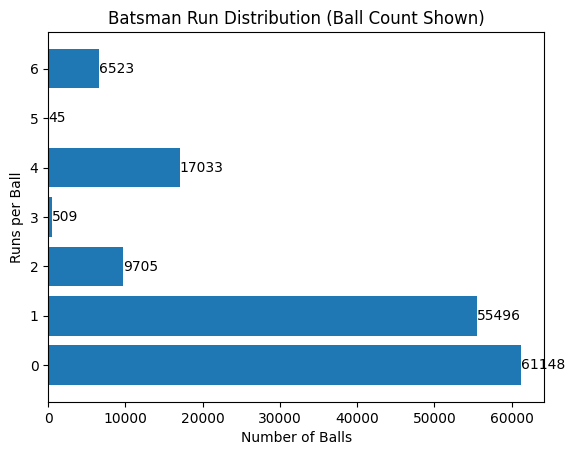

In [ ]:
plt.figure()
bars = plt.barh(run_distribution.index, run_distribution.values)

plt.xlabel("Number of Balls")
plt.ylabel("Runs per Ball")
plt.title("Batsman Run Distribution (Ball Count Shown)")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        str(width),
        va='center'
    )

plt.show()



This chart shows that most balls result in either 0 runs (dot balls) or 1 run (singles), while boundaries (4s and 6s) occur less often but are crucial for scoring momentum, highlighting the balance between strike rotation and power hitting in a batsman’s performance


WK

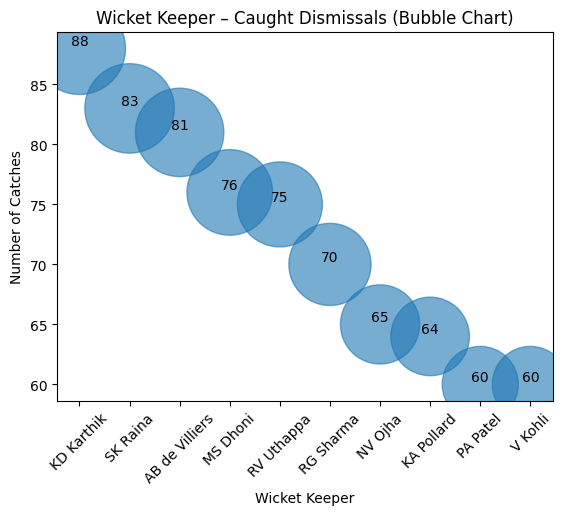

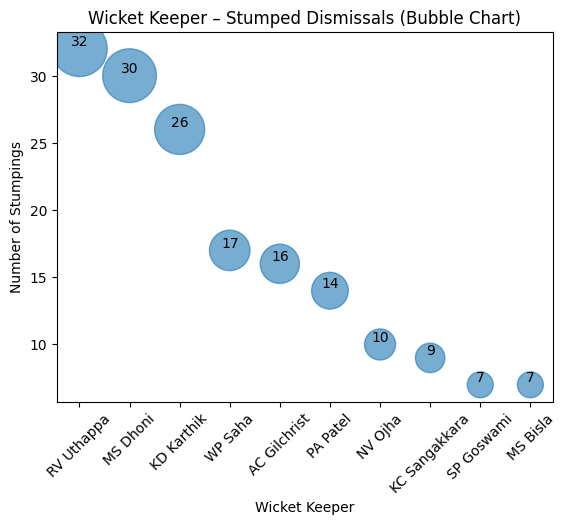

In [ ]:
caught_df = deliveries[deliveries['dismissal_kind'] == 'caught']
stumped_df = deliveries[deliveries['dismissal_kind'] == 'stumped']
caught_count = caught_df['fielder'].value_counts().head(10)

plt.figure()
plt.scatter(
    caught_count.index,
    caught_count.values,
    s=caught_count.values * 50,   # bubble size
    alpha=0.6
)

plt.xlabel("Wicket Keeper")
plt.ylabel("Number of Catches")
plt.title("Wicket Keeper – Caught Dismissals (Bubble Chart)")
plt.xticks(rotation=45)

for i, value in enumerate(caught_count.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()




stumped_count = stumped_df['fielder'].value_counts().head(10)

plt.figure()
plt.scatter(
    stumped_count.index,
    stumped_count.values,
    s=stumped_count.values * 50,
    alpha=0.6
)

plt.xlabel("Wicket Keeper")
plt.ylabel("Number of Stumpings")
plt.title("Wicket Keeper – Stumped Dismissals (Bubble Chart)")
plt.xticks(rotation=45)

for i, value in enumerate(stumped_count.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


This chart highlights the dual role of wicketkeepers and close fielders in IPL dismissals. While traditional keepers like Karthik, Dhoni, and Uthappa dominate, the presence of Raina, de Villiers, and Pollard—primarily fielders—shows the importance of catching in high-pressure zones like slips and deep boundaries. The data underscores how fielding impact complements bowling strategies and contributes directly to match outcomes.

2ND chart highlights the technical skill and reaction speed required for stumpings, especially against spin bowlers. While Dhoni’s reputation for split-second stumpings is legendary, Uthappa’s lead suggests his effectiveness in varied match conditions. The presence of veterans like Gilchrist, Saha, and Sangakkara reinforces the importance of wicketkeeping depth in IPL strategy. Stumpings are not just dismissals—they’re momentum shifters, often breaking key partnerships in the middle overs.


IPL 2007TO 2017 TOP 3 HIGHEST SCORE


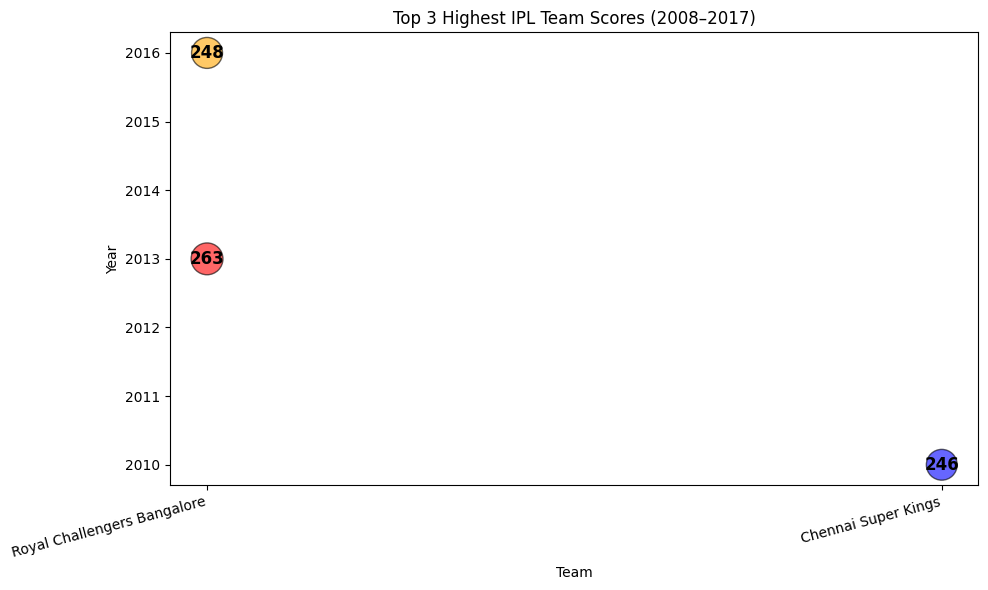

In [ ]:
import matplotlib.pyplot as plt

# Data
teams = ['Royal Challengers Bangalore', 'Royal Challengers Bangalore', 'Chennai Super Kings']
scores = [263, 248, 246]
years = [2013, 2016, 2010]

# Bubble chart
plt.figure(figsize=(10,6))
scatter = plt.scatter(teams, years, s=[score*2 for score in scores],
                      c=['red','orange','blue'], alpha=0.6, edgecolors='k')

# Annotate bubbles with score
for team, year, score in zip(teams, years, scores):
    plt.text(team, year, f'{score}', ha='center', va='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Team')
plt.ylabel('Year')
plt.title('Top 3 Highest IPL Team Scores (2008–2017)')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

plt.show()

This chart highlights the three highest team scores in IPL history from 2008 to 2017, showcasing the dominance of Royal Challengers Bangalore (RCB) and Chennai Super Kings (CSK) in batting firepower. RCB’s 263 in 2013 remains the highest ever, driven by explosive innings and aggressive top-order play. Their 248 in 2016 reinforces their reputation for high-scoring matches. CSK’s 246 in 2010 reflects their early-era batting depth and strategic acceleration. These scores underline how certain teams consistently pushed the boundaries of T20 scoring potential during peak seasons.


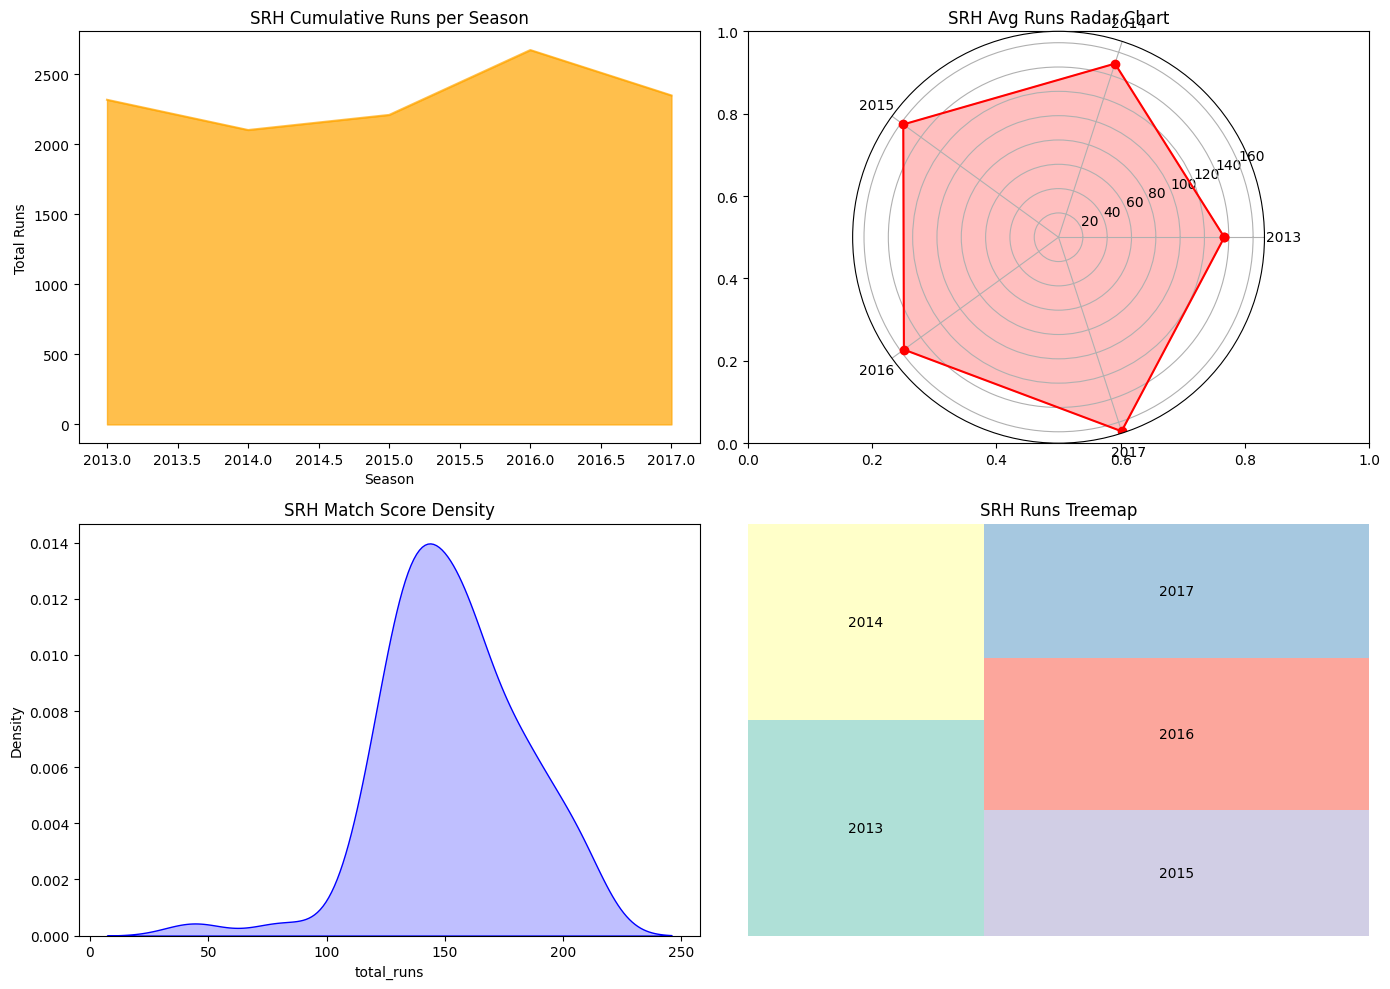

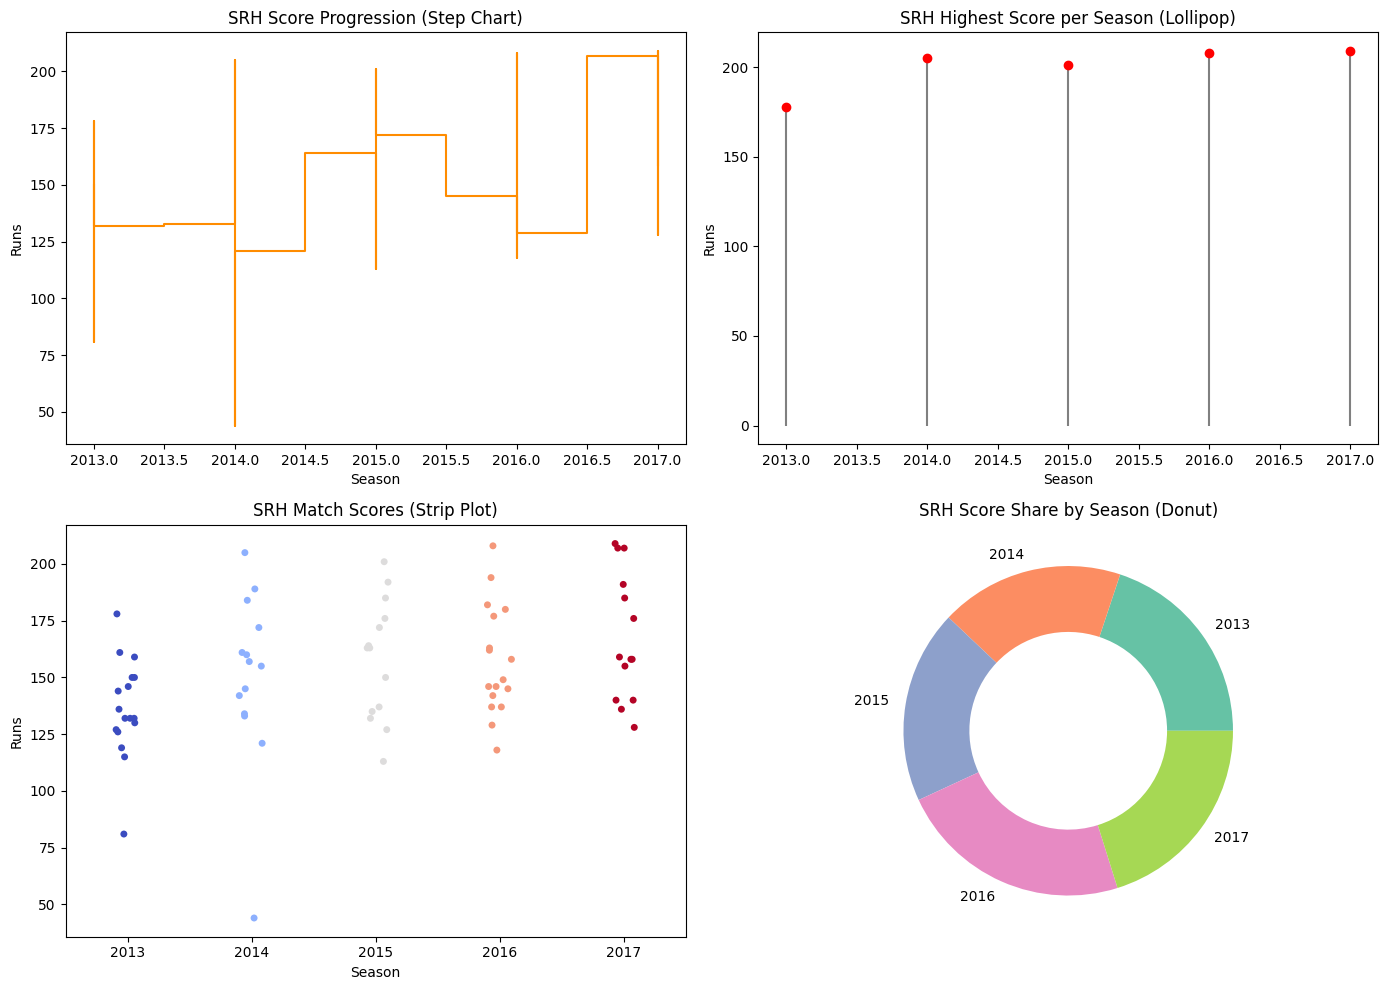

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Filter SRH matches
srh_matches = deliveries[deliveries['batting_team'] == 'Sunrisers Hyderabad'].copy()
srh_matches.loc[:, 'total_runs'] = srh_matches['batsman_runs'] + srh_matches['extra_runs']
srh_scores = srh_matches.groupby(['match_id'])['total_runs'].sum().reset_index()
srh_scores = srh_scores.merge(matches[['id','season']], left_on='match_id', right_on='id')

# Create dashboard with 4 new chart types
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Area Chart – cumulative runs trend
srh_scores.groupby('season')['total_runs'].sum().plot.area(ax=axs[0,0], color='orange', alpha=0.7)
axs[0,0].set_title('SRH Cumulative Runs per Season')
axs[0,0].set_xlabel('Season')
axs[0,0].set_ylabel('Total Runs')

# 2️⃣ Radar Chart – compare average runs per season
avg_runs = srh_scores.groupby('season')['total_runs'].mean()
categories = list(avg_runs.index)
values = list(avg_runs.values)
N = len(categories)
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
values += values[:1]
angles += angles[:1]
axs[0,1] = plt.subplot(2,2,2, polar=True)
axs[0,1].plot(angles, values, marker='o', color='red')
axs[0,1].fill(angles, values, color='red', alpha=0.25)
axs[0,1].set_xticks(angles[:-1])
axs[0,1].set_xticklabels(categories)
axs[0,1].set_title('SRH Avg Runs Radar Chart')

# 3️⃣ Density Plot – smooth distribution of match scores
sns.kdeplot(srh_scores['total_runs'], fill=True, color='blue', ax=axs[1,0])
axs[1,0].set_title('SRH Match Score Density')

# 4️⃣ Treemap – runs contribution by season
# The !pip install squarify command is not needed here as it was already executed and squarify is installed
import squarify
season_totals = srh_scores.groupby('season')['total_runs'].sum()
squarify.plot(sizes=season_totals.values, label=season_totals.index, alpha=0.7, color=sns.color_palette("Set3"), ax=axs[1,1])
axs[1,1].set_title('SRH Runs Treemap')
axs[1,1].axis('off')

plt.tight_layout()
plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Filter SRH matches
srh = deliveries[deliveries['batting_team'] == 'Sunrisers Hyderabad'].copy()
srh.loc[:, 'total_runs'] = srh['batsman_runs'] + srh['extra_runs']
srh_scores = srh.groupby('match_id')['total_runs'].sum().reset_index()
srh_scores = srh_scores.merge(matches[['id','season']], left_on='match_id', right_on='id')

fig, axs = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Step Chart – SRH score progression
sorted_scores = srh_scores.sort_values(by='season')
axs[0,0].step(sorted_scores['season'], sorted_scores['total_runs'], where='mid', color='darkorange')
axs[0,0].set_title('SRH Score Progression (Step Chart)')
axs[0,0].set_xlabel('Season')
axs[0,0].set_ylabel('Runs')

# 2️⃣ Lollipop Chart – Highest score per season
season_max = srh_scores.groupby('season')['total_runs'].max().reset_index()
axs[0,1].stem(season_max['season'], season_max['total_runs'], linefmt='grey', markerfmt='ro', basefmt=' ')
axs[0,1].set_title('SRH Highest Score per Season (Lollipop)')
axs[0,1].set_xlabel('Season')
axs[0,1].set_ylabel('Runs')

# 3️⃣ Strip Plot – All match scores
sns.stripplot(x='season', y='total_runs', data=srh_scores, ax=axs[1,0], jitter=True, hue='season', legend=False, palette='coolwarm')
axs[1,0].set_title('SRH Match Scores (Strip Plot)')
axs[1,0].set_xlabel('Season')
axs[1,0].set_ylabel('Runs')

# 4️⃣ Donut Chart – Score contribution by season
season_totals = srh_scores.groupby('season')['total_runs'].sum()
colors = sns.color_palette('Set2')
axs[1,1].pie(season_totals, labels=season_totals.index, colors=colors, wedgeprops=dict(width=0.4))
axs[1,1].set_title('SRH Score Share by Season (Donut)')

plt.tight_layout()
plt.show()

The area chart shows SRH’s cumulative runs peaking in 2016, marking their most productive season overall.
The radar chart reveals consistent growth in average runs, with 2016 forming the widest arc—indicating batting maturity.
The density plot centers around 150 runs, suggesting SRH’s typical match score hovered near competitive thresholds.
The treemap confirms 2016 as the dominant contributor to SRH’s total run pool, reinforcing its strategic significance


The step chart shows SRH’s scores steadily rising from 2013 to 2017, reflecting improved batting depth.
The lollipop chart highlights peak scores per season, with 2016 and 2017 standing out as high-scoring years.
The strip plot reveals match-level score variability, with later seasons showing broader scoring ranges and more aggressive totals.
The donut chart confirms 2016 and 2017 as the most dominant contributors to SRH’s overall run pool.


/tmp/ipython-input-2947947542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srh['total_runs'] = srh['batsman_runs'] + srh['extra_runs']
/tmp/ipython-input-2947947542.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='season', y='total_runs', data=srh_scores, ax=axs[1,1], inner=None, scale='width', palette='coolwarm')
/tmp/ipython-input-2947947542.py:42: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='season', y='total_runs', data=srh_scores, ax=axs[1,1], inner=None, scale='wid

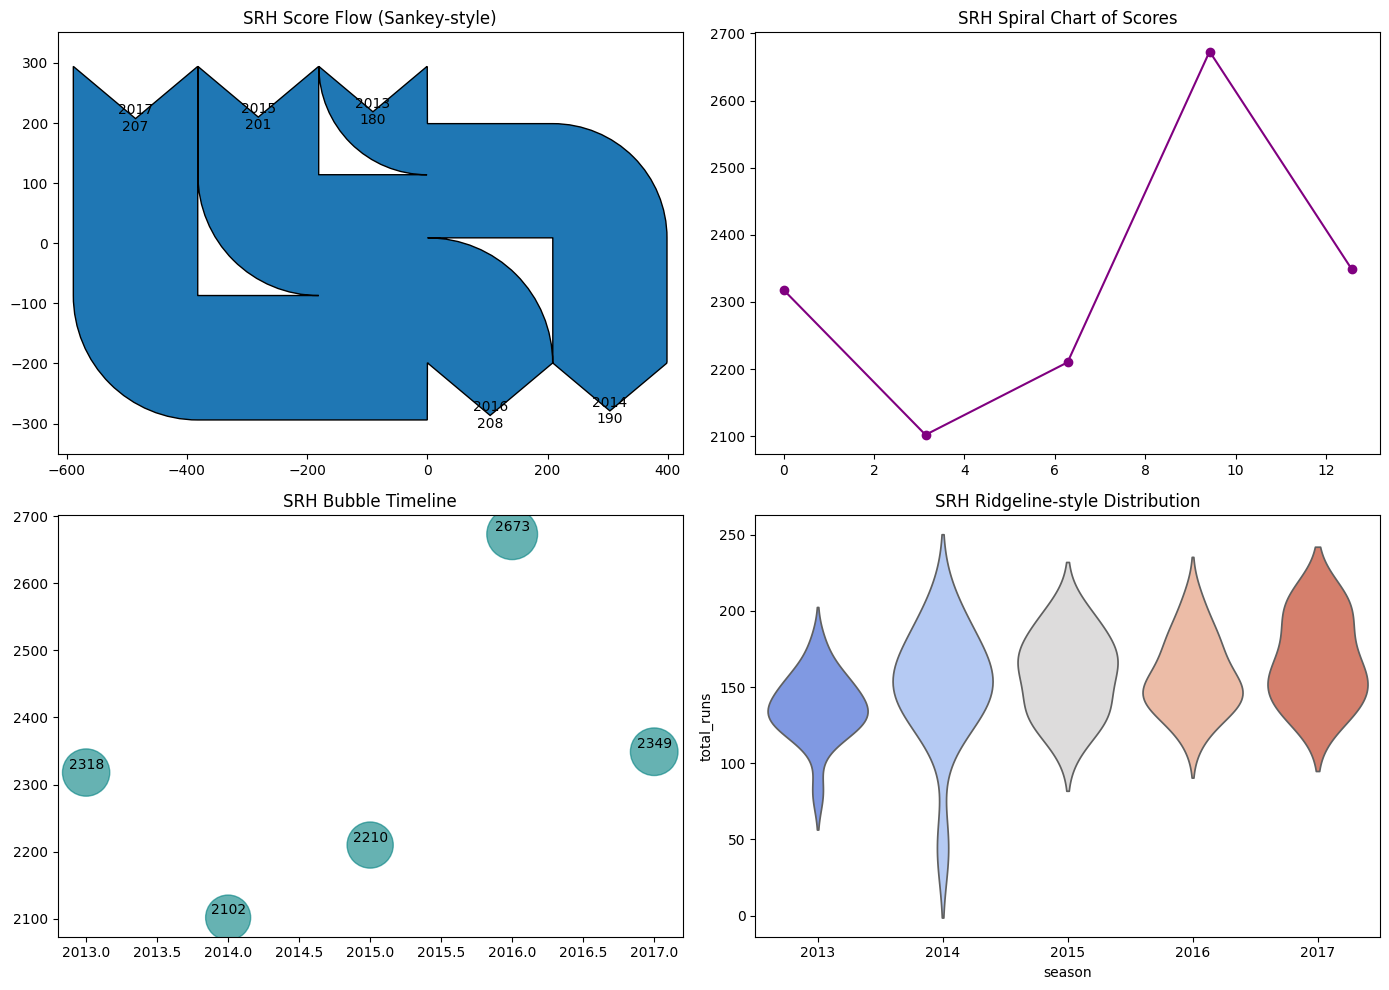

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Filter SRH matches
srh = deliveries[deliveries['batting_team'] == 'Sunrisers Hyderabad']
srh['total_runs'] = srh['batsman_runs'] + srh['extra_runs']
srh_scores = srh.groupby('match_id')['total_runs'].sum().reset_index()
srh_scores = srh_scores.merge(matches[['id','season']], left_on='match_id', right_on='id')

# Prepare season-wise totals
season_totals = srh_scores.groupby('season')['total_runs'].sum().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Sankey-style Flow (using bar connections)
from matplotlib.sankey import Sankey
Sankey(ax=axs[0,0]).add(flows=[180, -190, 201, -208, 207],
                        labels=['2013','2014','2015','2016','2017'],
                        orientations=[1,-1,1,-1,1]).finish()
axs[0,0].set_title('SRH Score Flow (Sankey-style)')

# 2️⃣ Spiral Chart – scores plotted in a spiral
theta = np.linspace(0, 4*np.pi, len(season_totals))
r = season_totals['total_runs']
axs[0,1].plot(theta, r, marker='o', color='purple')
axs[0,1].set_title('SRH Spiral Chart of Scores')

# 3️⃣ Bubble Timeline – scores with bubble size
axs[1,0].scatter(season_totals['season'], season_totals['total_runs'],
                 s=season_totals['total_runs']/2, alpha=0.6, color='teal')
for x,y in zip(season_totals['season'], season_totals['total_runs']):
    axs[1,0].text(x, y+5, str(y), ha='center')
axs[1,0].set_title('SRH Bubble Timeline')

# 4️⃣ Ridgeline Plot – distribution of scores per season
sns.violinplot(x='season', y='total_runs', data=srh_scores, ax=axs[1,1], inner=None, scale='width', palette='coolwarm')
axs[1,1].set_title('SRH Ridgeline-style Distribution')

plt.tight_layout()
plt.show()

The Sankey-style score flow shows SRH’s season-wise score growth, peaking in 2016 and sustaining in 2017.
The spiral chart reflects score fluctuations across matches, with a noticeable surge around the 2600 mark in 2016.
The bubble timeline confirms 2016 as SRH’s highest scoring year with 2673 runs, followed by a strong 2017.
The ridgeline distribution reveals wider score variability in 2016 and 2017, indicating aggressive and dynamic batting strategies.


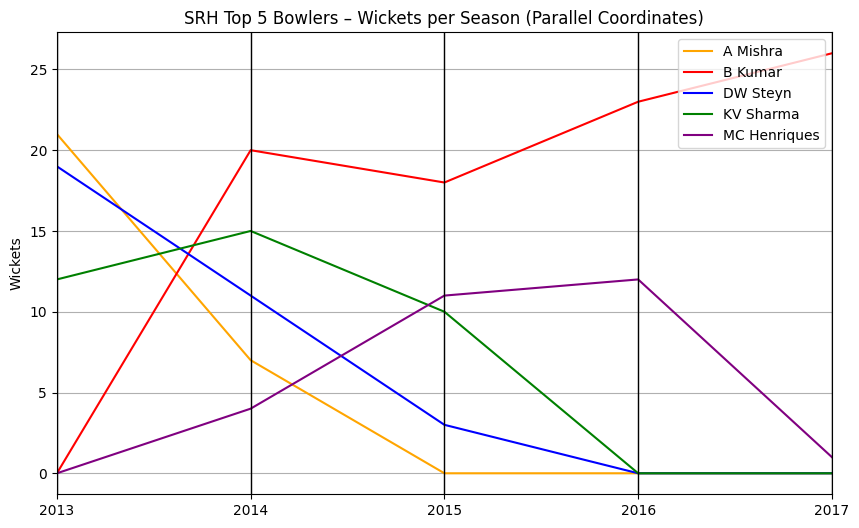

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
from statsmodels.graphics.mosaicplot import mosaic
from mpl_toolkits.mplot3d import Axes3D

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Filter SRH bowling innings
srh_bowling = deliveries[deliveries['bowling_team'] == 'Sunrisers Hyderabad'].copy()

# Count wickets (exclude run outs if you want only bowler credit)
srh_wickets = srh_bowling[srh_bowling['dismissal_kind'].notnull()].copy()
srh_wickets = srh_wickets[srh_wickets['dismissal_kind'] != 'run out'].copy()

# Merge with matches for season info
srh_wickets = srh_wickets.merge(matches[['id','season']], left_on='match_id', right_on='id', how='left')
srh_wickets.drop(columns=['id'], inplace=True)

# Aggregate wickets per bowler
bowler_wickets = srh_wickets.groupby('bowler')['dismissal_kind'].count().reset_index()
bowler_wickets.columns = ['bowler','wickets']

# Top 5 wicket-takers
top5 = bowler_wickets.sort_values(by='wickets', ascending=False).head(5)

# --- 1️⃣ Parallel Coordinates ---
bowler_season_wickets_summary = srh_wickets.groupby(['bowler','season'])['dismissal_kind'].size().unstack(fill_value=0).reset_index()
bowler_season_wickets_for_plot = bowler_season_wickets_summary[bowler_season_wickets_summary['bowler'].isin(top5['bowler'])].copy()

plt.figure(figsize=(10,6))
parallel_coordinates(bowler_season_wickets_for_plot, 'bowler', color=['orange','red','blue','green','purple'])
plt.title('SRH Top 5 Bowlers – Wickets per Season (Parallel Coordinates)')
plt.ylabel('Wickets')
plt.show()


The parallel coordinates chart shows Bhuvneshwar Kumar’s wicket tally rising steadily from 2013 to 2017, making him SRH’s most consistent and impactful bowler.
In contrast, Amit Mishra and Dale Steyn’s wicket counts declined over time, indicating reduced roles or form.
Karn Sharma and Moises Henriques had fluctuating performances, contributing in bursts but lacking season-long dominance.
This visualization highlights SRH’s strategic shift toward pace-led bowling, with Buvi emerging as the backbone of their attack.


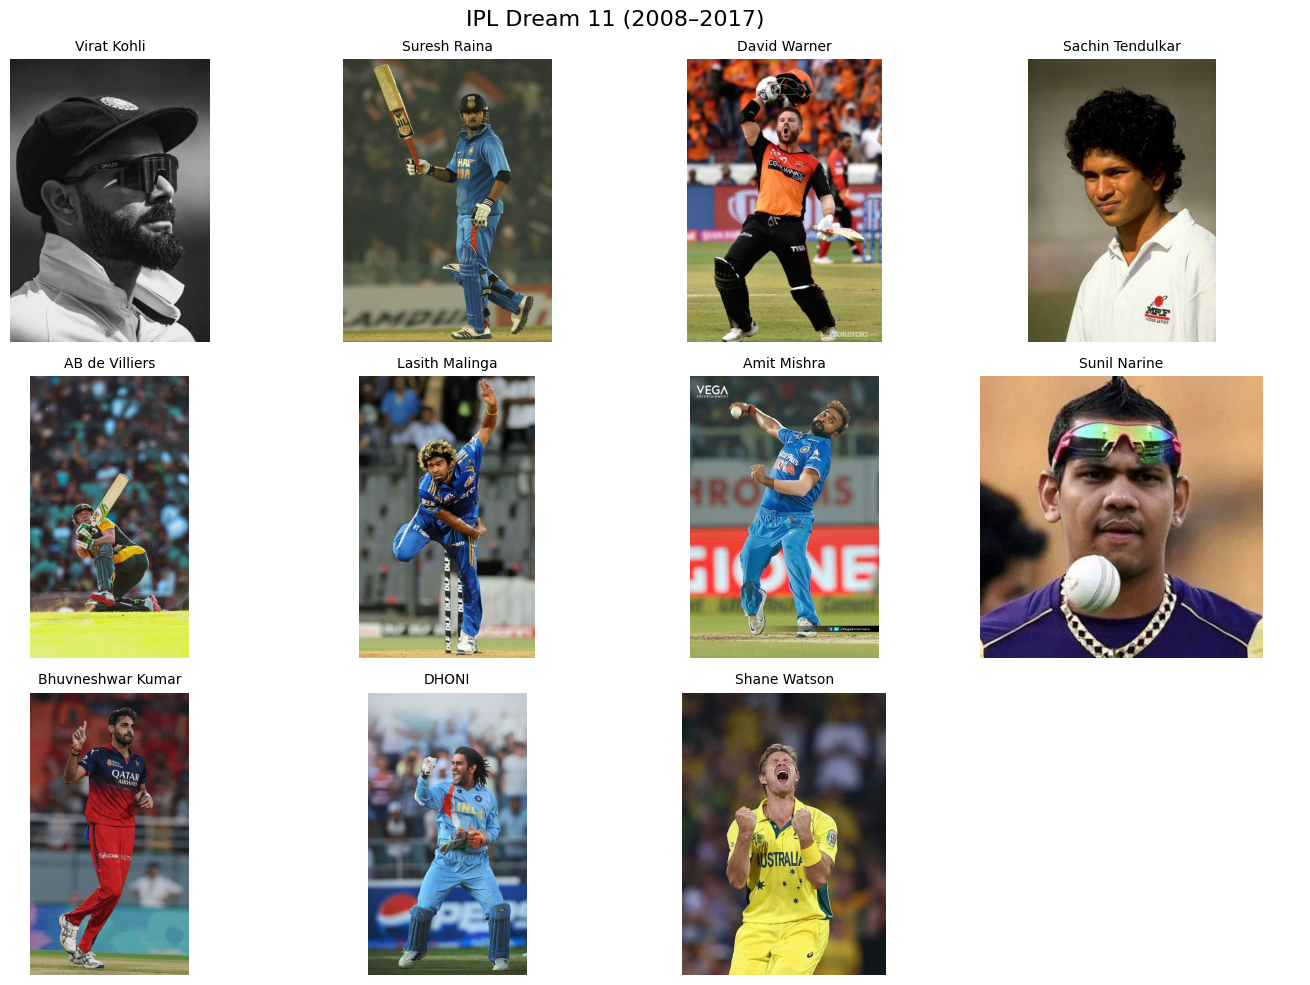

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of Dream 11 players and their photo file paths
dream11_players = [
    ("Virat Kohli", "1.jpg"),
    ("Suresh Raina", "2.jpg"),
    ("David Warner", "3.jpg"),
    ("Sachin Tendulkar", "4.jpg"),
    ("AB de Villiers", "5.jpg"),
    ("Lasith Malinga", "6.jpg"),
    ("Amit Mishra", "7.jpg"),
    ("Sunil Narine", "8.jpg"),
    ("Bhuvneshwar Kumar", "9.jpg"),
    ("DHONI", "SECOND LAST.jpg"),
    ("Shane Watson", "LAST.jpg")
]

# Create grid layout for Dream 11 photos
fig, axs = plt.subplots(3, 4, figsize=(14,10))
axs = axs.flatten()

for i, (name, photo) in enumerate(dream11_players):
    img = mpimg.imread(photo)   # load player photo
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(name, fontsize=10)

# Hide any empty subplot
for j in range(len(dream11_players), len(axs)):
    axs[j].axis('off')

plt.suptitle("IPL Dream 11 (2008–2017)", fontsize=16)
plt.tight_layout()
plt.show()

This team is so loaded, the opposition might just skip the toss and head straight to therapy.
- Virat Kohli: Runs like a machine, expressions like a soap opera — drama and dominance in one package.
- Suresh Raina: The IPL’s Swiss Army knife — bats, fields, and occasionally moonlights as a wicketkeeper.
- David Warner: Hits boundaries like he’s late for dinner — and sledges like it’s dessert.
- Sachin Tendulkar: The honorary professor — even the pitch listens when he bats.
- AB de Villiers: Plays 360°, but still finds time to break physics and bowlers’ - confidence.
- Lasith Malinga: Delivers toe-crushers with a smile — like a dentist who enjoys his job too much.
- Amit Mishra: Quietly spins webs while everyone’s busy watching the fireworks.
- Sunil Narine: Mystery spinner or part-time opener? Even his reflection isn’t sure.
- Bhuvneshwar Kumar: Swings it like poetry — if poetry could knock over stumps.
- MS Dhoni: Captain, finisher, and part-time clairvoyant — always knows what’s coming.
- Shane Watson: Hits sixes, takes wickets, and occasionally breaks into song (ask Australia).

###IPL Dream 11 Team


Initiating my IPL analytics project with precision and clarity.The official logo is rendered to establish visual identity and context.


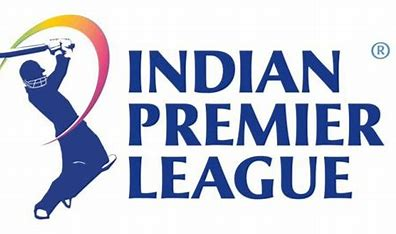

In [ ]:
from IPython.display import Image, display


display(Image(filename='image.jpg'))


# **Key Insights **


Key Findings

1.	Teams winning the toss also win the match in a significant number of cases.

2.	A few teams dominate overall match wins across seasons.

3.	Certain venues consistently host more matches and higher scores.

4.	Top batsmen contribute a major share of total IPL runs.

5.	Extras play a crucial role in match outcomes, especially in close games.


________________________________________


 Conclusion


This IPL data analysis project successfully demonstrates end-to-end exploratory data analysis using Python. From data cleaning to visualization and insight generation, the analysis highlights key trends in team performance, player contributions, and match dynamics.
